<a href="https://colab.research.google.com/github/anandkiit/Diabetes-prediction-model/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pip insatll kaggle

In [1]:
!pip install kaggle

In [2]:
# configurating the path of kaggll.json file
# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing face amsk Dataset

In [3]:
# Api to fetch the datset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 125MB/s]
100% 163M/163M [00:01<00:00, 136MB/s]


In [4]:
# extracting the compessed dstaset
from zipfile import ZipFile
datset = '/content/face-mask-dataset.zip'

with ZipFile(datset,'r') as zip:
  zip.extractall()
  print('The datset is extracted')

The datset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the dependecies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3111.jpg', 'with_mask_445.jpg', 'with_mask_2347.jpg', 'with_mask_2757.jpg', 'with_mask_2266.jpg']
['with_mask_2603.jpg', 'with_mask_3031.jpg', 'with_mask_1106.jpg', 'with_mask_302.jpg', 'with_mask_2910.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1874.jpg', 'without_mask_3281.jpg', 'without_mask_3522.jpg', 'without_mask_1561.jpg', 'without_mask_2292.jpg']
['without_mask_156.jpg', 'without_mask_1419.jpg', 'without_mask_84.jpg', 'without_mask_670.jpg', 'without_mask_3256.jpg']


In [9]:
print('Number of with mask mask images', len(with_mask_files))
print('Number of without mask mask images', len(without_mask_files))

Number of with mask mask images 3725
Number of without mask mask images 3828


**Creating Labels for the two classes of images**

with mask--> 1

without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels=[0]*3828


In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images **

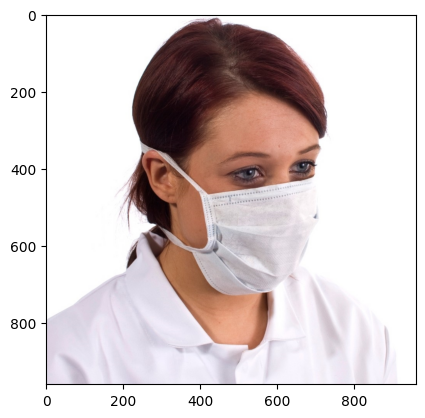

In [14]:
# displaying with face mask
img = mpimg.imread('/content/data/with_mask/with_mask_3189.jpg')
imgplot = plt.imshow(img)
plt.show()

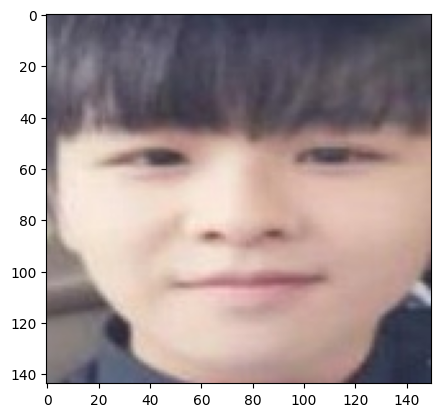

In [17]:
# displaying without face mask
img = mpimg.imread('/content/data/without_mask/without_mask_3281.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1. Resize the images

2. convert the images to numpy arrays

In [18]:
# convert images to numpy arrrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[ 28,  23,  19],
        [ 28,  23,  19],
        [ 96,  91,  84],
        ...,
        [146, 147, 139],
        [149, 147, 140],
        [152, 147, 141]],

       [[ 29,  24,  20],
        [ 26,  21,  17],
        [ 91,  86,  79],
        ...,
        [147, 148, 140],
        [149, 148, 140],
        [153, 148, 142]],

       [[ 28,  23,  19],
        [ 23,  18,  14],
        [ 83,  79,  71],
        ...,
        [148, 149, 141],
        [150, 148, 141],
        [152, 148, 141]],

       ...,

       [[ 30,  17,  14],
        [ 31,  18,  15],
        [ 32,  19,  16],
        ...,
        [171, 180, 183],
        [171, 177, 178],
        [164, 168, 167]],

       [[ 32,  19,  15],
        [ 33,  20,  16],
        [ 33,  20,  16],
        ...,
        [201, 206, 209],
        [196, 200, 200],
        [186, 189, 187]],

       [[ 34,  23,  17],
        [ 34,  23,  17],
        [ 34,  23,  17],
        ...,
        [205, 208, 207],
        [196, 198, 197],
        [184, 186, 183]]], dtype=uint8)
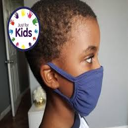

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [25]:
type(x)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [27]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


Train Test split

In [29]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [30]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255



array([[[212, 212, 220],
        [213, 213, 221],
        [214, 214, 222],
        ...,
        [205, 209, 221],
        [203, 207, 219],
        [202, 206, 218]],

       [[213, 213, 221],
        [214, 214, 222],
        [215, 215, 223],
        ...,
        [205, 209, 221],
        [203, 207, 219],
        [202, 206, 218]],

       [[214, 214, 222],
        [215, 214, 223],
        [215, 215, 223],
        ...,
        [205, 209, 221],
        [204, 207, 219],
        [203, 206, 218]],

       ...,

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
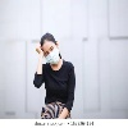

In [32]:
x_train[0]

In [33]:
x_train_scaled[0]

array([[[0.83137255, 0.83137255, 0.8627451 ],
        [0.83529412, 0.83529412, 0.86666667],
        [0.83921569, 0.83921569, 0.87058824],
        ...,
        [0.80392157, 0.81960784, 0.86666667],
        [0.79607843, 0.81176471, 0.85882353],
        [0.79215686, 0.80784314, 0.85490196]],

       [[0.83529412, 0.83529412, 0.86666667],
        [0.83921569, 0.83921569, 0.87058824],
        [0.84313725, 0.84313725, 0.8745098 ],
        ...,
        [0.80392157, 0.81960784, 0.86666667],
        [0.79607843, 0.81176471, 0.85882353],
        [0.79215686, 0.80784314, 0.85490196]],

       [[0.83921569, 0.83921569, 0.87058824],
        [0.84313725, 0.83921569, 0.8745098 ],
        [0.84313725, 0.84313725, 0.8745098 ],
        ...,
        [0.80392157, 0.81960784, 0.86666667],
        [0.8       , 0.81176471, 0.85882353],
        [0.79607843, 0.80784314, 0.85490196]],

       ...,

       [[1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686],
        [1.        , 1

Building a convolutional Neural Network(CNN)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(1128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),  # Add this layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7312 - loss: 2.3789 - val_accuracy: 0.9058 - val_loss: 0.2727
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9323 - loss: 0.1893 - val_accuracy: 0.9025 - val_loss: 0.2708
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9682 - loss: 0.1126 - val_accuracy: 0.9025 - val_loss: 0.3142
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9773 - loss: 0.0763 - val_accuracy: 0.9025 - val_loss: 0.3309
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9875 - loss: 0.0439 - val_accuracy: 0.9008 - val_loss: 0.3055


Model Evaluation

In [42]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9079 - loss: 0.3931
Test Accuracy =  0.9046988487243652


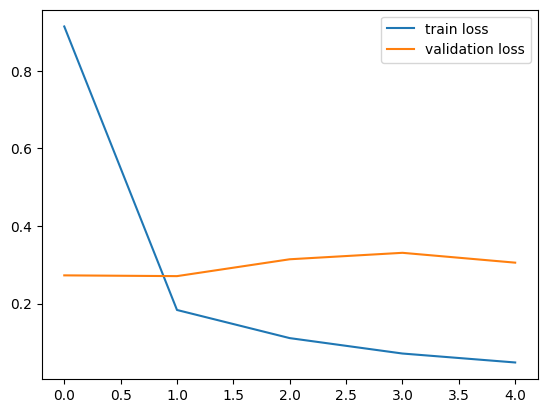

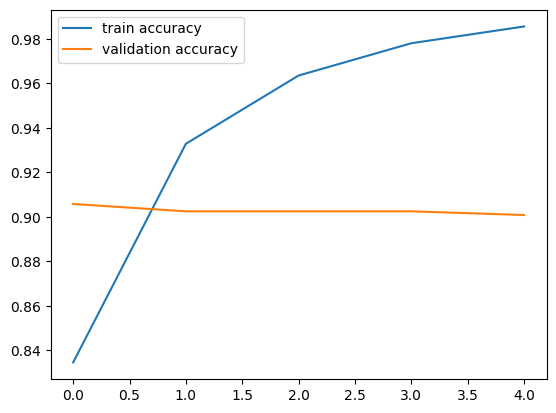

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

path of the image to be predicted:/content/collegegilrls.jpeg


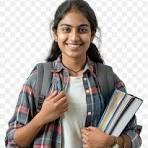

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[2.0697175e-03 9.9793029e-01 9.7032833e-15 5.9810785e-14 1.7746923e-15
  9.9792314e-15 1.8120652e-14 1.1796418e-14 4.3041576e-14 4.9359198e-13]]
1
The person in the image is  not wearing a mask


In [51]:
input_image_path = input('path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is  not wearing a mask')

else:
  print('The person in the image is  wearing a mask')